In [1]:
print(sys.getrecursionlimit())

3000


In [2]:
sys.setrecursionlimit(10000)

# 2.3 Fundamentals of Visualization libraries Part 1 ß Matplotlib
## Table of contents:
### 1. Importing libraries and dataset
### 2. Line plot with pandas
### 3. Create a column with the count of trips
### 4. Create 2 plots on a dual axis

### 1. Importing libraries and dataset

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [4]:
import matplotlib

In [5]:
df_merged = pd.read_pickle('ny_data.pickle')

In [6]:
df_merged.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [7]:
df_merged.drop(columns = {'_merge'}, inplace = True)

In [8]:
df_merged.drop(columns = {'Unnamed: 0'}, inplace = True)

In [9]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,2022-01-18,1.8
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,2022-01-21,-6.0
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,2022-01-22,-5.9
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.915840,40.768692,-73.924957,member,2022-01-19,3.2
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,member,2022-01-16,-8.0


In [10]:
df_merged.shape

(30689921, 15)

In [11]:
df_merged.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [12]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [13]:
df_merged.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### 2. Line plot with pandas

In [14]:
df_temp = df_merged.set_index('date')

In [15]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,1.8
2022-01-21,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,-6.0
2022-01-22,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,-5.9
2022-01-19,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.915840,40.768692,-73.924957,member,3.2
2022-01-16,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,member,-8.0


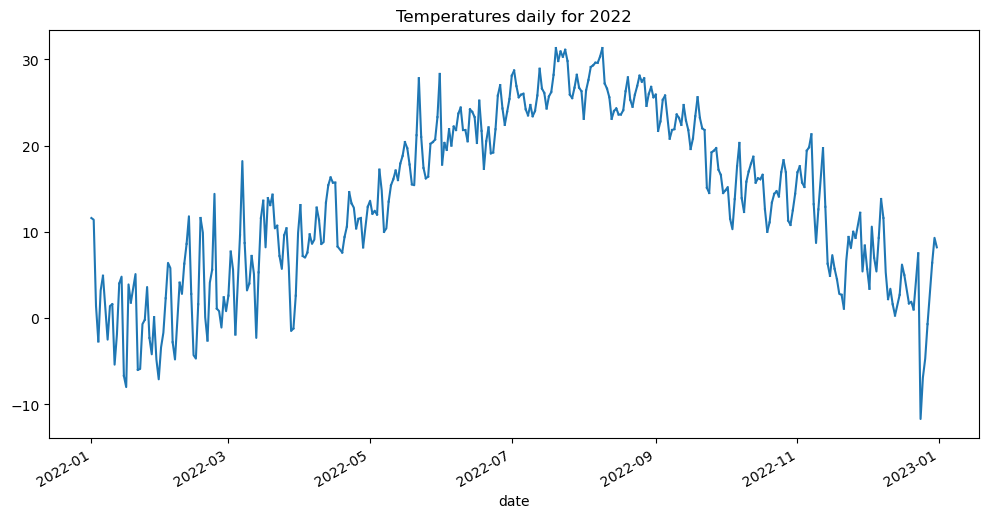

In [16]:
# Set the value of agg.path.chunksize to a number greater than 100
plt.rcParams['agg.path.chunksize'] = 100000

# adjusting the path simplification threshold
plt.rcParams['path.simplify_threshold'] = 1.0

# Set the figure size to make the plot wider
plt.figure(figsize=(12, 6))  # Width=12 inches, Height=6 inches
plt.title('Temperatures daily for 2022')

# plotting the data
df_temp['avgTemp'].plot()
plt.show()

### 3. Create a column with the count of trips

In [17]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [18]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df_merged.groupby(['date'])['ride_id'].count()).reset_index()

In [19]:
df_group.head()

,date,ride_id
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126
3,2022-01-04,37879
4,2022-01-05,35080


In [20]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df_merged = df_merged.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df_merged['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df_merged[df_merged['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df_merged[df_merged['date'] == '2022-01-02'].shape) # Second check 

df_temp = df_merged.set_index('date')

print(df_temp.columns)

_merge
both          30689921
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20895, 17)
Shape of January 2nd is (44234, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [21]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,1.8,44045,both
2022-01-18,75EAB4C9619AB463,classic_bike,2022-01-18 16:45:52,2022-01-18 16:56:03,W 49 St & 8 Ave,6747.06,Amsterdam Ave & W 73 St,7260.09,40.762272,-73.987882,40.779668,-73.980930,member,1.8,44045,both
2022-01-18,582C4FB96E010416,classic_bike,2022-01-18 08:45:24,2022-01-18 08:54:11,E 88 St & 1 Ave,7235.13,2 Ave & E 72 St,6925.09,40.778301,-73.948813,40.768762,-73.958408,member,1.8,44045,both
2022-01-18,4FAA081EE6A9B319,electric_bike,2022-01-18 18:12:01,2022-01-18 18:17:15,Clermont Ave & Lafayette Ave,4461.01,Emerson Pl & Myrtle Ave,4683.02,40.687645,-73.969689,40.693631,-73.962236,member,1.8,44045,both
2022-01-18,AA6CE6206341D731,electric_bike,2022-01-18 13:14:24,2022-01-18 13:25:50,Court St & State St,4488.08,Emerson Pl & Myrtle Ave,4683.02,40.690238,-73.992031,40.693631,-73.962236,member,1.8,44045,both


### 4. Create 2 plots on a dual axis

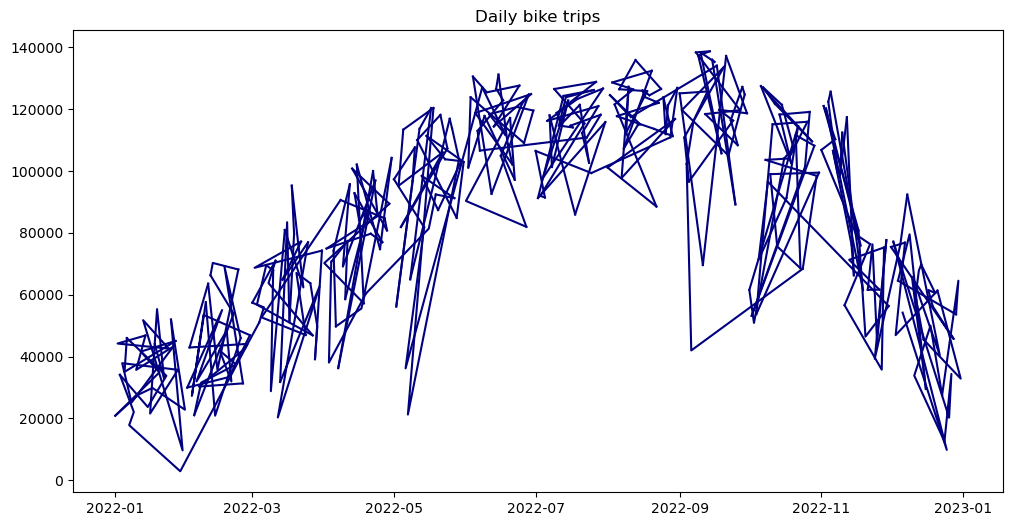

In [23]:
# first try the plot of the bike rides

plt.figure(figsize=(12,6))
plt.title('Daily bike trips')
plt.plot(df_temp['bike_rides_daily'], color = 'navy')
plt.show()

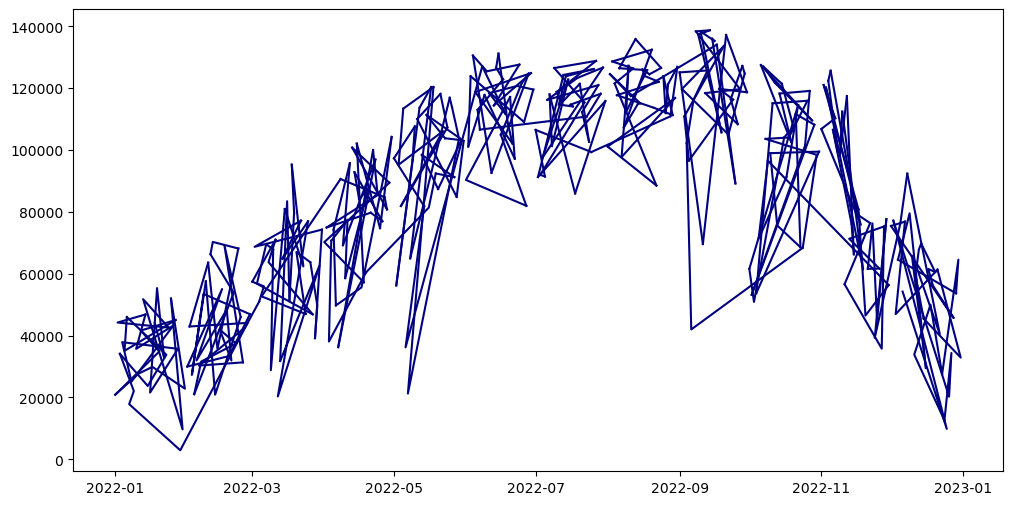

In [24]:
# Create figure and axis objects with subplots() for only the bike rides column

fig,ax = plt.subplots(figsize=(12, 6))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")

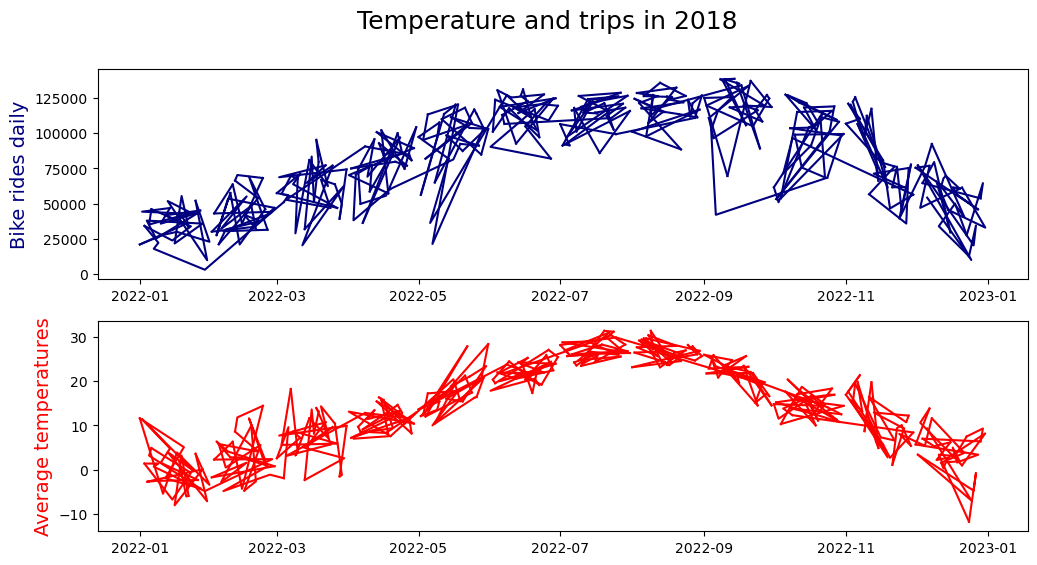

In [25]:
# Create figure and axis objects with subplots() for both columns, with their own legend and seperate y axis

fig,ax = plt.subplots(2, figsize =(12, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2018', fontsize = 18)

plt.show()

### I have decided to use two different axes for the columns, so that it shows two different lineplots in the same figure. I have decided this as it is a large dataset which shows a slightly complicated lineplot for both the daily bike rides column and the average temperature column. If I would have decided to create a twin axi in which both lineplots are overlapping, the results are less clear

In [26]:
df_temp.to_pickle('ny_data_task2point3.pickle')

In [27]:
# Convert both columns to a string data type
df_temp['start_station_id'] = df_temp['start_station_id'].astype(str)
df_temp['end_station_id'] = df_temp['end_station_id'].astype(str)

In [28]:
# all rows from both start_station_id and end_station_id columns that contain points
new_df_temp = df_temp[df_temp['start_station_id'].str.contains('\.') & df_temp['end_station_id'].str.contains('\.')]

In [30]:
# filter out all rows from both start_station_id and end_station_id columns that does not contain points
df_temp_bad = df_temp[~df_temp['start_station_id'].str.contains('\.') & ~df_temp['end_station_id'].str.contains('\.')]

In [31]:
df_temp_bad.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-26,97BE6D001F65E203,classic_bike,2022-01-26 14:54:50,2022-01-26 14:55:03,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753650,-73.996629,40.75404,-73.996466,member,-2.3,43279,both
2022-01-26,2BB97F62637347E6,classic_bike,2022-01-26 13:12:44,2022-01-26 13:12:58,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753653,-73.996616,40.75404,-73.996466,member,-2.3,43279,both
2022-01-26,9624AC65344E2C65,classic_bike,2022-01-26 12:59:49,2022-01-26 13:00:25,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753683,-73.996418,40.75404,-73.996466,member,-2.3,43279,both
2022-01-26,A5CE9A166ADD035C,classic_bike,2022-01-26 13:48:13,2022-01-26 13:49:12,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753671,-73.996549,40.75404,-73.996466,member,-2.3,43279,both
2022-01-26,E7FF417AF04A6E61,classic_bike,2022-01-26 15:35:02,2022-01-26 15:37:53,Lab - NYC,Lab - NYC,Lab - NYC,Lab - NYC,40.753985,-73.996656,40.75404,-73.996466,member,-2.3,43279,both


In [32]:
df_temp_bad.shape

(291, 16)

In [33]:
new_df_temp.shape

(30614721, 16)

In [34]:
new_df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')

In [35]:
new_df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,1.8,44045,both
2022-01-18,75EAB4C9619AB463,classic_bike,2022-01-18 16:45:52,2022-01-18 16:56:03,W 49 St & 8 Ave,6747.06,Amsterdam Ave & W 73 St,7260.09,40.762272,-73.987882,40.779668,-73.980930,member,1.8,44045,both
2022-01-18,582C4FB96E010416,classic_bike,2022-01-18 08:45:24,2022-01-18 08:54:11,E 88 St & 1 Ave,7235.13,2 Ave & E 72 St,6925.09,40.778301,-73.948813,40.768762,-73.958408,member,1.8,44045,both
2022-01-18,4FAA081EE6A9B319,electric_bike,2022-01-18 18:12:01,2022-01-18 18:17:15,Clermont Ave & Lafayette Ave,4461.01,Emerson Pl & Myrtle Ave,4683.02,40.687645,-73.969689,40.693631,-73.962236,member,1.8,44045,both
2022-01-18,AA6CE6206341D731,electric_bike,2022-01-18 13:14:24,2022-01-18 13:25:50,Court St & State St,4488.08,Emerson Pl & Myrtle Ave,4683.02,40.690238,-73.992031,40.693631,-73.962236,member,1.8,44045,both
